In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

%matplotlib inline

In [2]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', 
                 header=0,
                 names=['id', 'clothing_id', 'age', 'title', 'review_text', 'rating', 'rec_ind', 'pos_count',
                         'division_name', 'dept_name', 'class_name'],
                 index_col='id')

In [3]:
df.head()

,clothing_id,age,title,review_text,rating,rec_ind,pos_count,division_name,dept_name,class_name
id,,,,,,,,,,
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
df.shape

(23486, 10)

## Remove columns that we can't use

In [5]:
df = df[['age', 'title', 'review_text', 'division_name', 'dept_name']]

In [6]:
df.sample(5)

,age,title,review_text,division_name,dept_name
id,,,,,
17762,55,Unusual and gorgeous,This print combination is like an arts and cra...,General,Tops
5006,60,Classic flannel,This is a simplistic beauty. the colors are lo...,General,Tops
19023,25,Flattering and attractive!!!!,Love these shorts! not too tight and not too s...,General,Bottoms
15837,48,So super soft!,This is great and very soft inside. i am weari...,Initmates,Intimate
448,51,Vibrant red color,I got this shirt in red and black. both colors...,General,Tops


In [7]:
df['age'].describe()

count    23486.000000
mean        43.198544
std         12.279544
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: age, dtype: float64

In [8]:
# Assuming that the data was collected in 2019
# Age < 100 => decades can go from 1920, 1930, ..., 2000 => 9 classes
# df['decade'] = df['Age'] - df['Age'] % 
DATA_COLLECTION_DATE = 2019
birth_year = DATA_COLLECTION_DATE - df['age']
df['decade'] = birth_year - (birth_year % 10)
df = df.drop('age', axis=1)

In [9]:
df.sample(n=5)

,title,review_text,division_name,dept_name,decade
id,,,,,
18349,"Pretty dress, runs large",I just received this dress in the mail today. ...,General,Dresses,1980
4624,Wearable art,I bought this recently after trying on both th...,General,Tops,1950
18181,Sizing runs very large,"I am petite and ordered size small, and it cam...",Initmates,Intimate,1990
4522,"Love, love, love it!",This top fits well as expected for the size. i...,General,Tops,1960
11460,Love it...,I just bought this top in size medium and i lo...,General,Tops,1960


# Split into train, val, test

In [10]:
TEST_PERC = 0.2
VAL_PERC = 0.1

In [11]:
train_df, test_df = train_test_split(df, test_size=TEST_PERC)
train_df, val_df = train_test_split(train_df, test_size=VAL_PERC)

In [12]:
print(f"train shape: {train_df.shape}")
print(f"val shape: {val_df.shape}")
print(f"test shape: {test_df.shape}")

train shape: (16909, 5)
val shape: (1879, 5)
test shape: (4698, 5)


In [13]:
16909/23486

0.7199608277271566

# Target distribution

In [14]:
CLASSES = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000]
classes2idx = {c: i for i, c in enumerate(CLASSES)}

(array([  10.,   63.,  251., 1673., 2875., 4392., 5533., 2079.,   33.]),
 array([1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]),
 <a list of 9 Patch objects>)

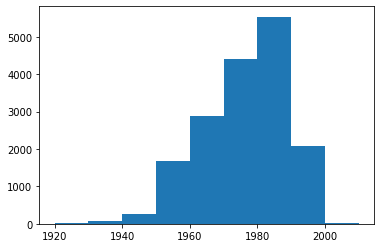

In [15]:
plt.hist(train_df['decade'], bins=CLASSES + [2010])

# Feature Engineering

## Is the review text useful?

1920


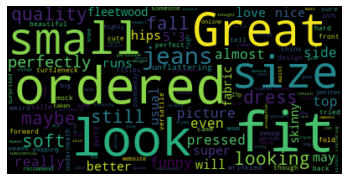

1930


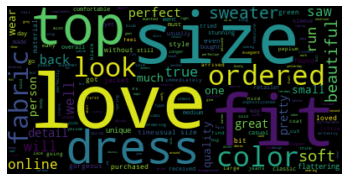

1940


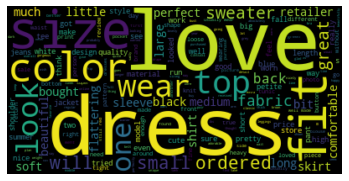

1950


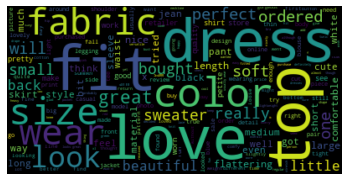

1960


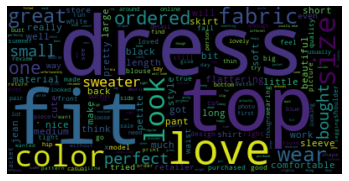

1970


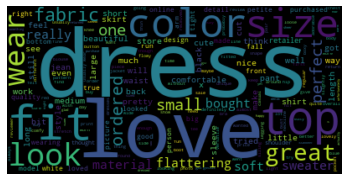

1980


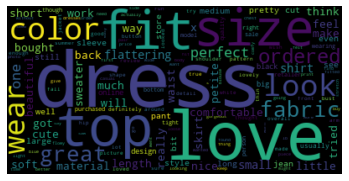

1990


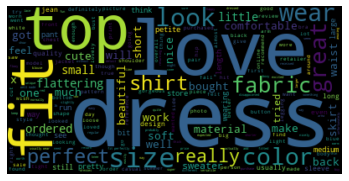

2000


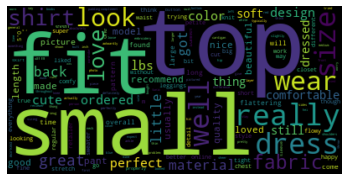

In [16]:
for c in CLASSES:
    print(c)
    df_c = train_df[train_df['decade'] == c]
    text_c = df_c['review_text'].str.cat(sep=' ')
    if len(text_c) == 0:
        continue
    wc = WordCloud().generate(text_c)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

1920


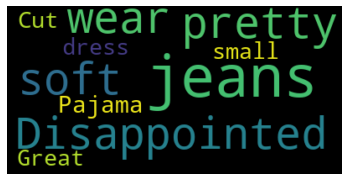

1930


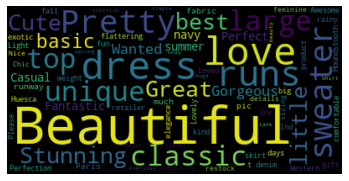

1940


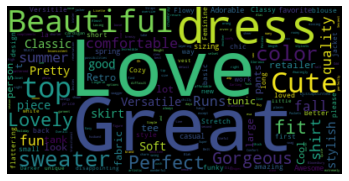

1950


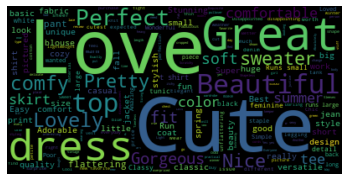

1960


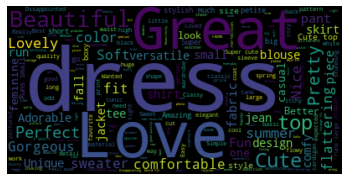

1970


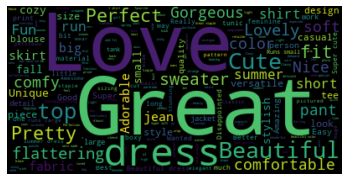

1980


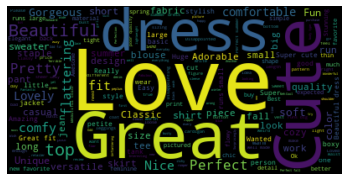

1990


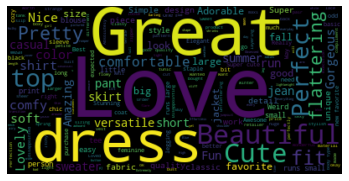

2000


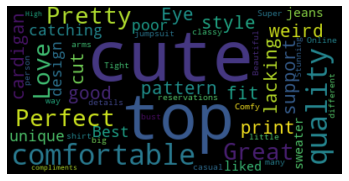

In [17]:
for c in CLASSES:
    print(c)
    df_c = train_df[train_df['decade'] == c]
    text_c = df_c['title'].str.cat(sep=' ')
    if len(text_c) == 0:
        continue
    wc = WordCloud().generate(text_c)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

## Is division name useful?

In [18]:
train_df['division_name'].value_counts()

General           9939
General Petite    5877
Initmates         1080
Name: division_name, dtype: int64

1920


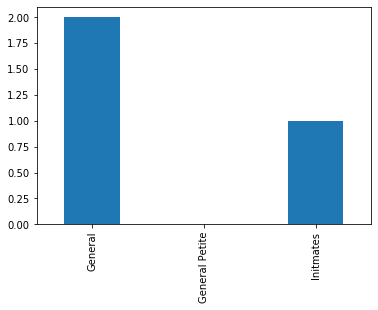

1930


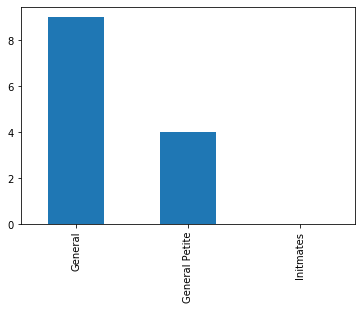

1940


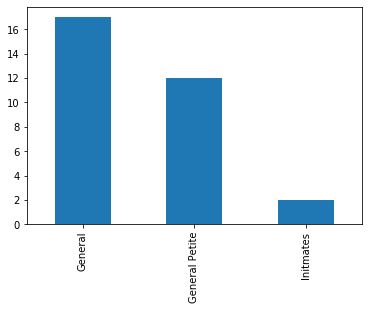

1950


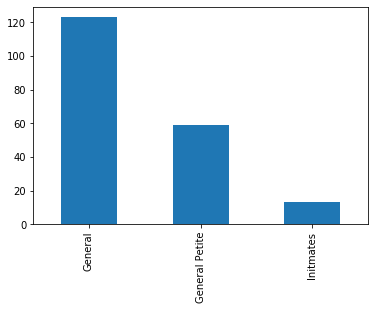

1960


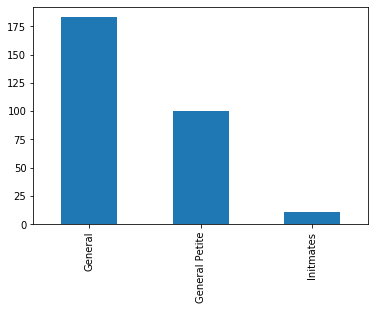

1970


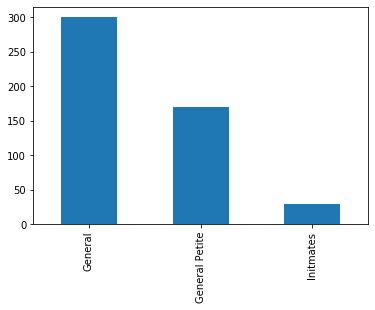

1980


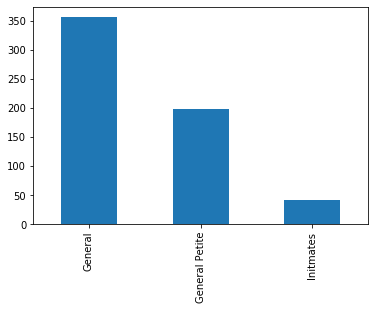

1990


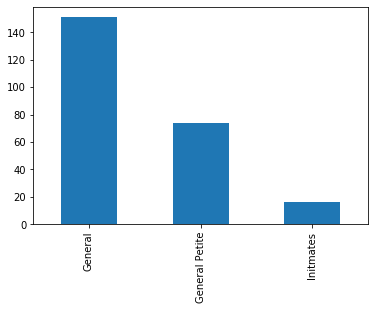

2000


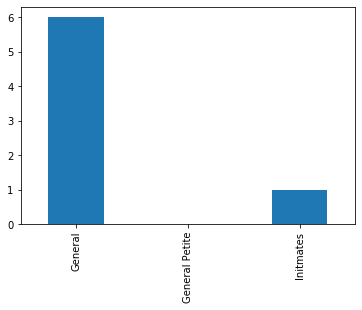

In [19]:
mapping = {c: i for i, c in enumerate(['General', 'General Petite', 'Initmates'])}
for c in CLASSES:
    print(c)
    df_c = val_df[val_df['decade']==c]
    df_c.division_name.value_counts().reindex(['General', 'General Petite', 'Initmates']).plot(kind='bar')
    plt.show()

## Is department name useful?

In [20]:
train_df['dept_name'].value_counts()

Tops        7590
Dresses     4497
Bottoms     2740
Intimate    1248
Jackets      742
Trend         79
Name: dept_name, dtype: int64

1920


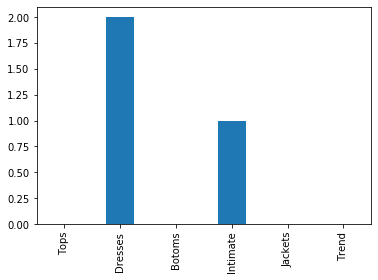

1930


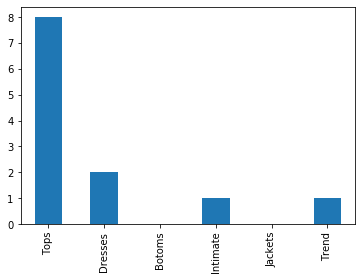

1940


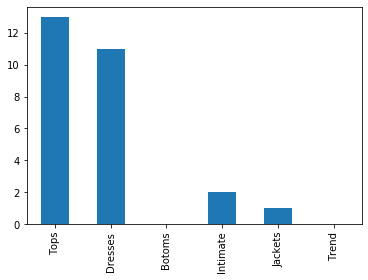

1950


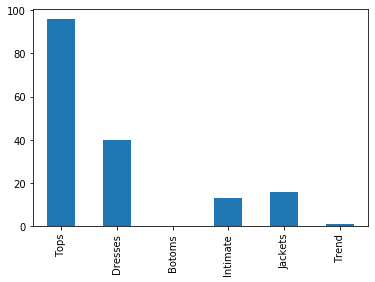

1960


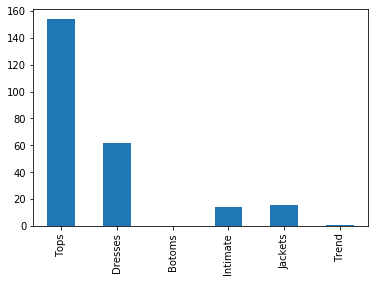

1970


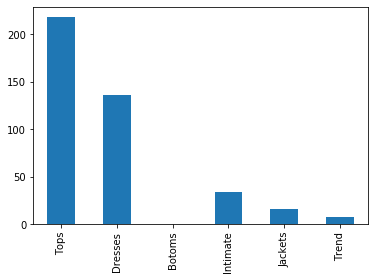

1980


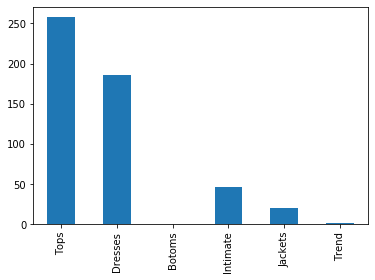

1990


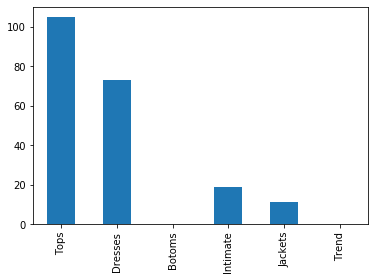

2000


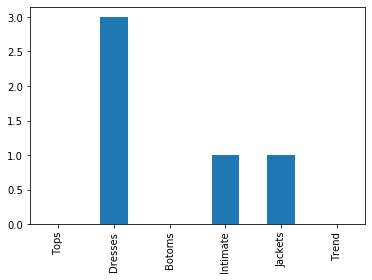

In [21]:
for c in CLASSES:
    print(c)
    df_c = val_df[val_df['decade']==c]
    df_c.dept_name.value_counts().reindex(['Tops', 'Dresses', 'Botoms', 'Intimate', 'Jackets', 'Trend']).plot(kind='bar')
    plt.show()

# Text features

In [22]:
# Combine review title and text
def combine_text(df, col1, col2, new_col='text', sep=' . '):
    df[new_col] = df[col1].str.cat(df[col2], sep=sep)
    return df

In [23]:
train_df = combine_text(train_df, 'title', 'review_text', new_col='text', sep=' . ')
val_df = combine_text(val_df, 'title', 'review_text', new_col='text', sep=' . ')
test_df = combine_text(test_df, 'title', 'review_text', new_col='text', sep=' . ')

/home/manik/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
from collections import Counter
all_text = train_df['text'].str.cat(sep=' ')
cnt = Counter(all_text.split(' '))

In [25]:
len(cnt)

33857

In [26]:
all_reviews = train_df['text'].str.cat(sep='####')
all_reviews = all_reviews.split('####')

In [27]:
lens = [len(review.split(' ')) for review in all_reviews]

In [28]:
print(np.mean(lens))
print(np.min(lens))
print(np.max(lens))

66.42586304470855
5
122


## First, remove missing values

In [29]:
train_df = train_df.dropna(axis='rows', how='any', subset=['text'])
val_df = val_df.dropna(axis='rows', how='any', subset=['text'])
test_df = test_df.dropna(axis='rows', how='any', subset=['text'])

# Save the dataset

In [30]:
train_df['target'] = train_df['decade'].map(classes2idx)
val_df['target'] = val_df['decade'].map(classes2idx)
test_df['target'] = test_df['decade'].map(classes2idx)

In [31]:
train_dataset = train_df[['text', 'target']]
val_dataset = val_df[['text', 'target']]
test_dataset = test_df[['text', 'target']]

In [32]:
train_dataset.head()

,text,target
id,,
14016,Definitely size down . This dress is beautiful...,4
12647,Love these pants . I bought these immediately ...,4
22644,Modern with retro flair . Very cool top! i pur...,5
852,The perfect fall dress . Ordered this dress on...,5
20253,"Timeless black velvet top . This is a classic,...",4


In [33]:
train_dataset.to_csv('ebay_train.csv')
val_dataset.to_csv('ebay_val.csv')
test_dataset.to_csv('ebay_test.csv')